In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
# можно и так: import seaborn as sb
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline

1) Данные
Данные (house_train.csv) представляют собой набор данных о ценах на
жилье. Подготовьте информацию о датасете:

pd.set_option('display.max_columns', 100)
df = pd.read_csv('house_train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

Приведите описание датасета:
- Сколько данных в датасете?
– Сколько параметров? Выведите список всех параметров.
– Есть ли категориальные признаки? Перечислите / выведите их.
– Выведите первые пять строчек DataFrame.
– По умолчанию pandas, ради экономии времени, указывает приблизительные
сведения об использовании памяти объектом DataFrame. Если нас интересуют
точные сведения, то нужно установить параметр memory_usage в значение
'deep':

Пусть Имя DataFrame – df, тогда исполняем инструкцию:
df.info(memory_usage='deep')


In [4]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('data\house_train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_16640\695590532.py:2: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('data\house_train.csv')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
num_rows = df.shape[0]

num_columns = df.shape[1]
columns_list = df.columns.tolist()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

first_five_rows = df.head()

memory_info = df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
print(f'Количество данных в датасете: {num_rows}')
print(f'Количество параметров: {num_columns}')
print(f'Список всех параметров: {columns_list}')
print(f'Категориальные признаки: {categorical_columns}')
print('Первые пять строчек DataFrame:')
print(first_five_rows)

Количество данных в датасете: 1460
Количество параметров: 80
Список всех параметров: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', '

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

а) чему равно среднее значение? - mean     180921.195890
б) чему равно стандартное отклонение?  - std       79442.502883

In [14]:
na_number=(df.isna().sum())
print(na_number)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [15]:
duplicated_number=df.duplicated().sum()
print(duplicated_number)

0


In [16]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
na_count = df.isnull().sum().sort_values(ascending=False) #Вычисляем, сколько пропущенных значений в параметрах 3
na_rate = na_count / len(df) # Вычисляем частоту или вероятность, с которой пропущенное значение встречается в каждом параметре. Если вероятность большая (>0.5), столбцыпараметры можно смело удалять).
# формируем массив для печати
na_data = pd.concat([na_count,
na_rate],axis=1,keys=['count','ratio'])
print(na_data)

               count     ratio
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
MasVnrType       872  0.597260
...              ...       ...
MoSold             0  0.000000
YrSold             0  0.000000
SaleType           0  0.000000
SaleCondition      0  0.000000
SalePrice          0  0.000000

[80 rows x 2 columns]


In [18]:
df.shape

(1460, 80)

In [19]:
df_new=df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)
print(df_new.isna().sum())


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64


In [20]:
df_new.shape

(1460, 77)

In [21]:
df_new = df_new.drop(['GarageQual', 'GarageCond', 'Fence'],
axis=1)
print(df_new.isna().sum()) 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64


In [22]:
df_new.shape

(1460, 74)

In [23]:
df_new=df_new.drop(['MasVnrArea', 'MasVnrType'], axis=1)
print(df_new.isna().sum()) 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 72, dtype: int64


In [24]:
df_new.shape

(1460, 72)

**6**

In [25]:
df = df_new

In [26]:
df.shape


(1460, 72)

In [27]:
df = pd.read_csv('data\house_train.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_16640\2149148008.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('data\house_train.csv')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**6.1**

C:\Users\User\AppData\Local\Temp\ipykernel_16640\3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

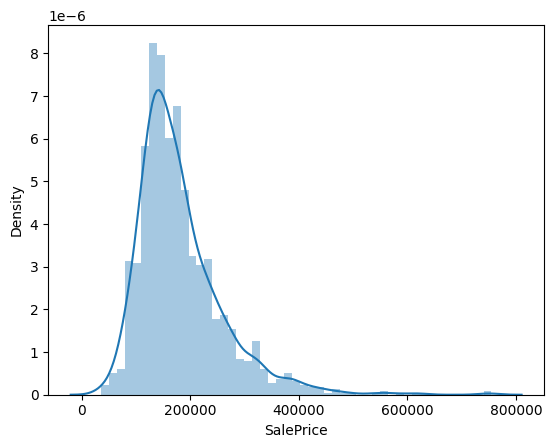

In [28]:
sns.distplot(df['SalePrice'])

In [29]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


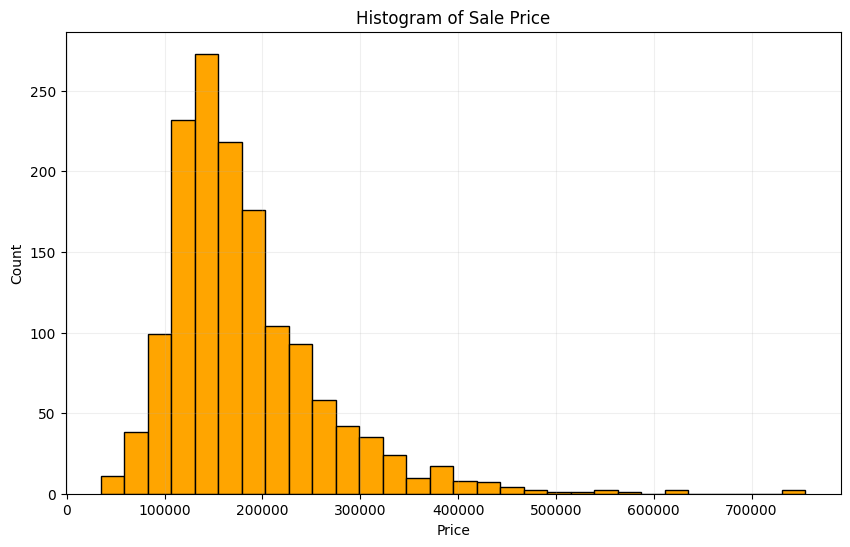

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Sale Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(alpha=0.2)

**6.2**

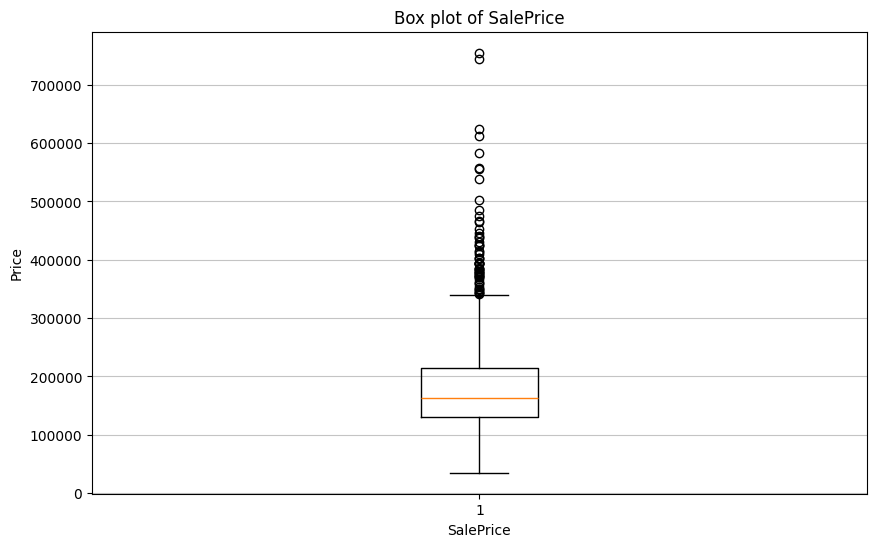

In [40]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['SalePrice'], vert=True)
plt.title('Box plot of SalePrice')
plt.ylabel('Price')
plt.xlabel('SalePrice')
plt.grid(axis='y', alpha=0.75)

**6.4**

In [41]:
x = df.OverallQual.value_counts()
x/x.sum()

OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: count, dtype: float64

а) Таблица частот размеров гаража

In [42]:
x = df.GarageCars.value_counts()
x/x.sum()

GarageCars
2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: count, dtype: float64

А) Ответ: 2  0.564384

б) Таблица частот центрального кондиционирования

In [43]:
x = df.CentralAir.value_counts()
x/x.sum()

CentralAir
Y    0.934932
N    0.065068
Name: count, dtype: float64

**6.5**

In [44]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [45]:
print('The proportion of the houses with prices between 25th percentile and 75th percentile: ', np.mean((df.SalePrice >= 129975) & (df.SalePrice <=214000)))

The proportion of the houses with prices between 25th percentile and 75th percentile:  0.5020547945205479


In [46]:
print('The proportion of house with total square feet of basement area between 25th percentile and 75th percentile:', np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <=
1298.25)))


The proportion of house with total square feet of basement area between 25th percentile and 75th percentile: 0.5


In [47]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <=
1298.25)
print(np.mean(a | b))


0.7143835616438357


In [48]:
q75, q25 =np.percentile(df.loc[df['CentralAir']=='N']['SalePrice'],[75,25])
iqr = q75 - q25
print('Sale price IQR for houses with no air conditioning:', iqr)


Sale price IQR for houses with no air conditioning: 46500.0


In [49]:
q75, q25 =np.percentile(df.loc[df['CentralAir']=='Y']['SalePrice'],
[75,25])
iqr = q75 - q25
print('Sale price IQR for houses with air conditioning: ', iqr)


Sale price IQR for houses with air conditioning:  84410.0


**6.6**

<Axes: xlabel='AgeGrp', ylabel='SalePrice'>

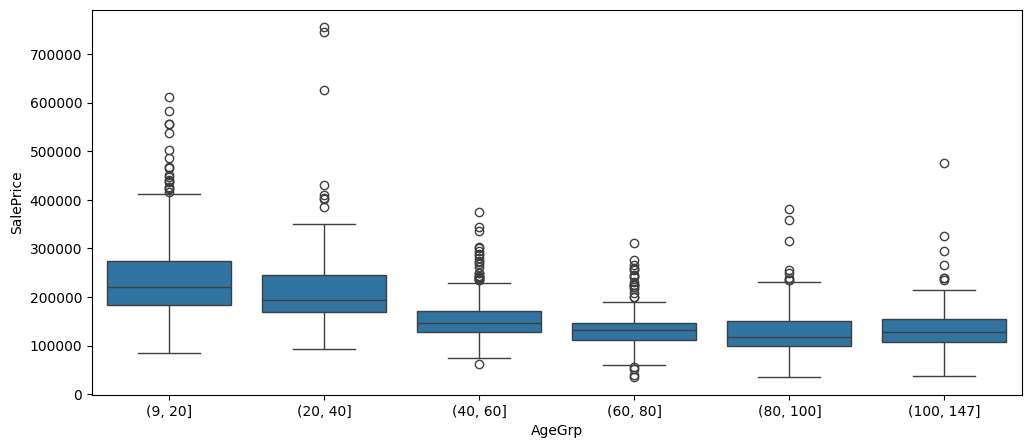

In [50]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80, 100, 147]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))
sns.boxplot(x="AgeGrp", y="SalePrice", data=df)

Вопрос: Сравните возраст дома и среднюю цену на него. Какая наблюдается
закономерность? 

Ответ: Чем старше дом тем меньше средняя цена

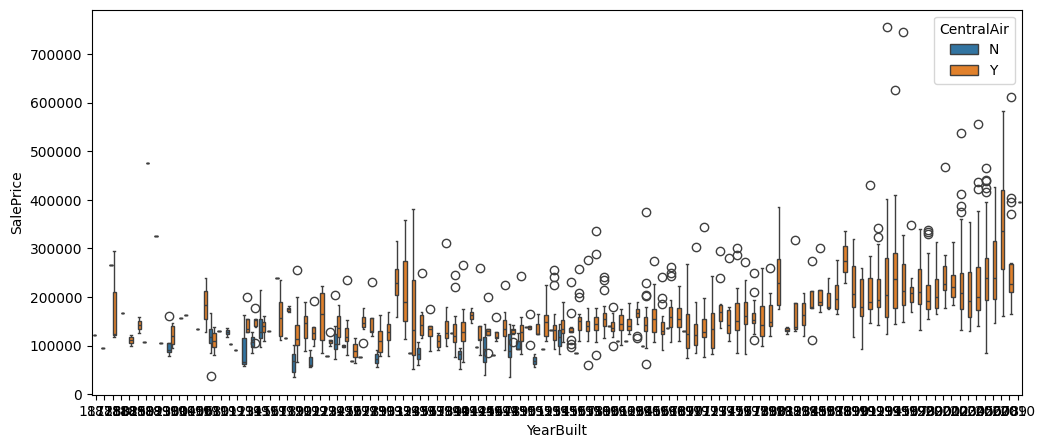

In [53]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="YearBuilt", y="SalePrice",hue="CentralAir", data=df)
plt.show()

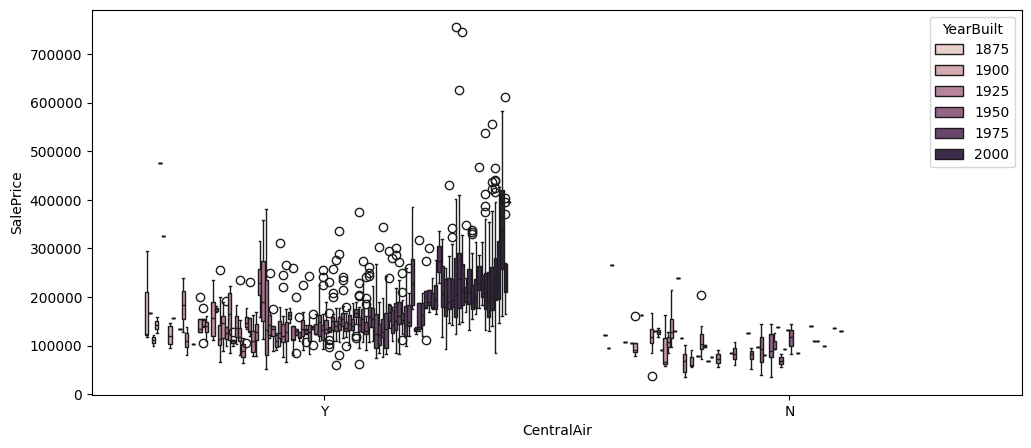

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="CentralAir", y="SalePrice", hue="YearBuilt", data=df)
plt.show()


In [55]:
df1 = df.groupby(["YearBuilt", "CentralAir"])["BldgType"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.apply(lambda x: x/x.sum(), axis=1)
print(df1.to_string(float_format="%.3f"))

BldgType              1Fam  2fmCon  Duplex  Twnhs  TwnhsE
YearBuilt CentralAir                                     
1872      N          1.000     NaN     NaN    NaN     NaN
1875      N          1.000     NaN     NaN    NaN     NaN
1880      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1882      Y          1.000     NaN     NaN    NaN     NaN
1885      Y          0.500   0.500     NaN    NaN     NaN
1890      Y          1.000     NaN     NaN    NaN     NaN
1892      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1893      Y          1.000     NaN     NaN    NaN     NaN
1898      N          1.000     NaN     NaN    NaN     NaN
1900      N          0.400   0.600     NaN    NaN     NaN
          Y          0.400   0.400   0.200    NaN     NaN
1904      Y          1.000     NaN     NaN    NaN     NaN
1905      N            NaN   1.000     NaN    NaN     NaN
1906      Y   

**Сделайте вывод: какие по возрасту дома более оснащены кондиционерами.**

Вывод: Чем старше дом, тем вероятнее, что нет
кондиционера. Больше всего кондицинер есть в домах, которые 2000х

**6.6**

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

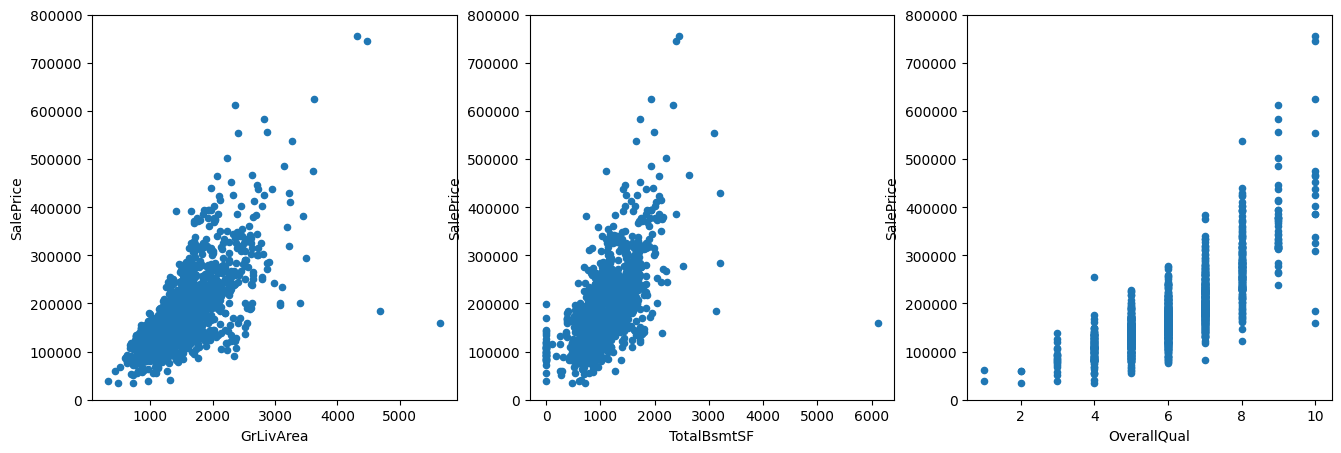

In [57]:
output,var,var1,var2 = 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual'
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df.plot.scatter(x=var,y=output,ylim=(0,800000),ax=axes[0])
df.plot.scatter(x=var1,y=output,ylim=(0,800000),ax=axes[1])
df.plot.scatter(x=var2,y=output,ylim=(0,800000),ax=axes[2])

**Наблюдается ли взаимосвязь между переменными?**

Ответ: Между переменными (площадь жилого помещения, площадь подвала, общее качество дома) и ценой продажи существует явная взаимосвязь

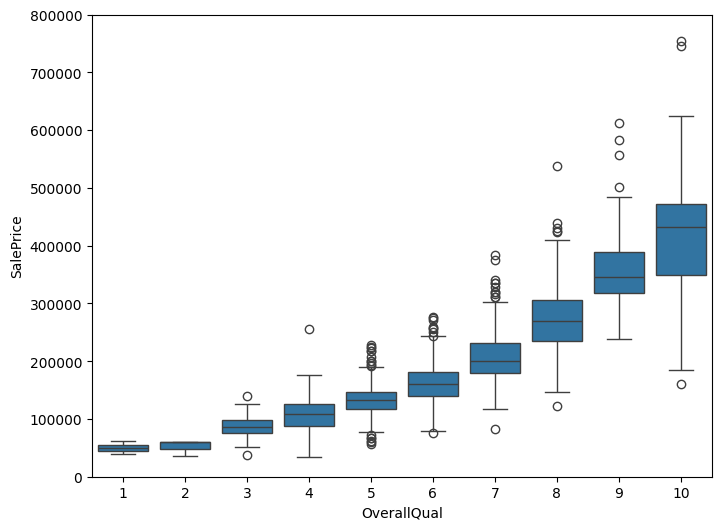

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=var2,y=output,data=df)
ax.set_ylim(0,800000)
plt.show()

**Между какими параметрами построен boxplot? Есть ли выбросы в данных?**

Ответ: между параметрами SalePrice и OverallQual, выбросы наблюдаются

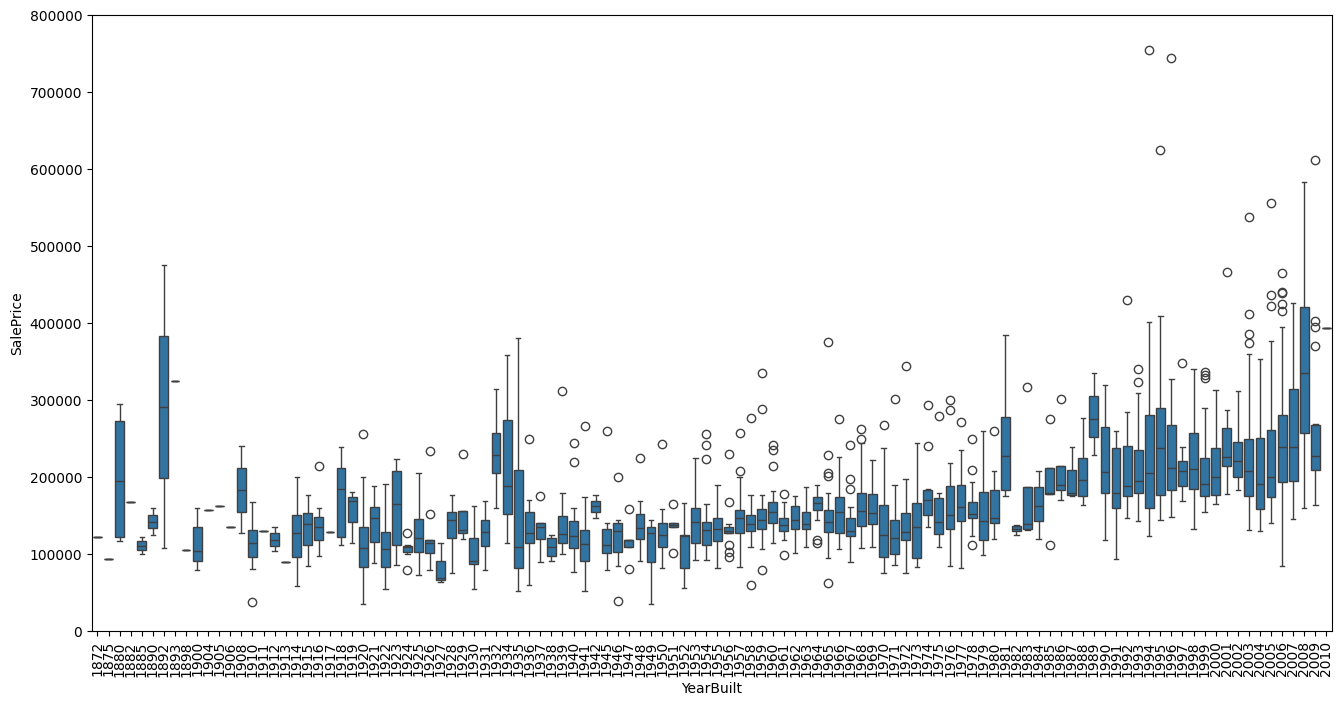

In [59]:
var3 = 'YearBuilt'
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=var3,y=output,data=df)
ax.set_ylim(0,800000)
plt.xticks(rotation=90)
plt.show()


**6.7. Графическая матрица, объединяющая точечные и столбчатые
диаграммы**

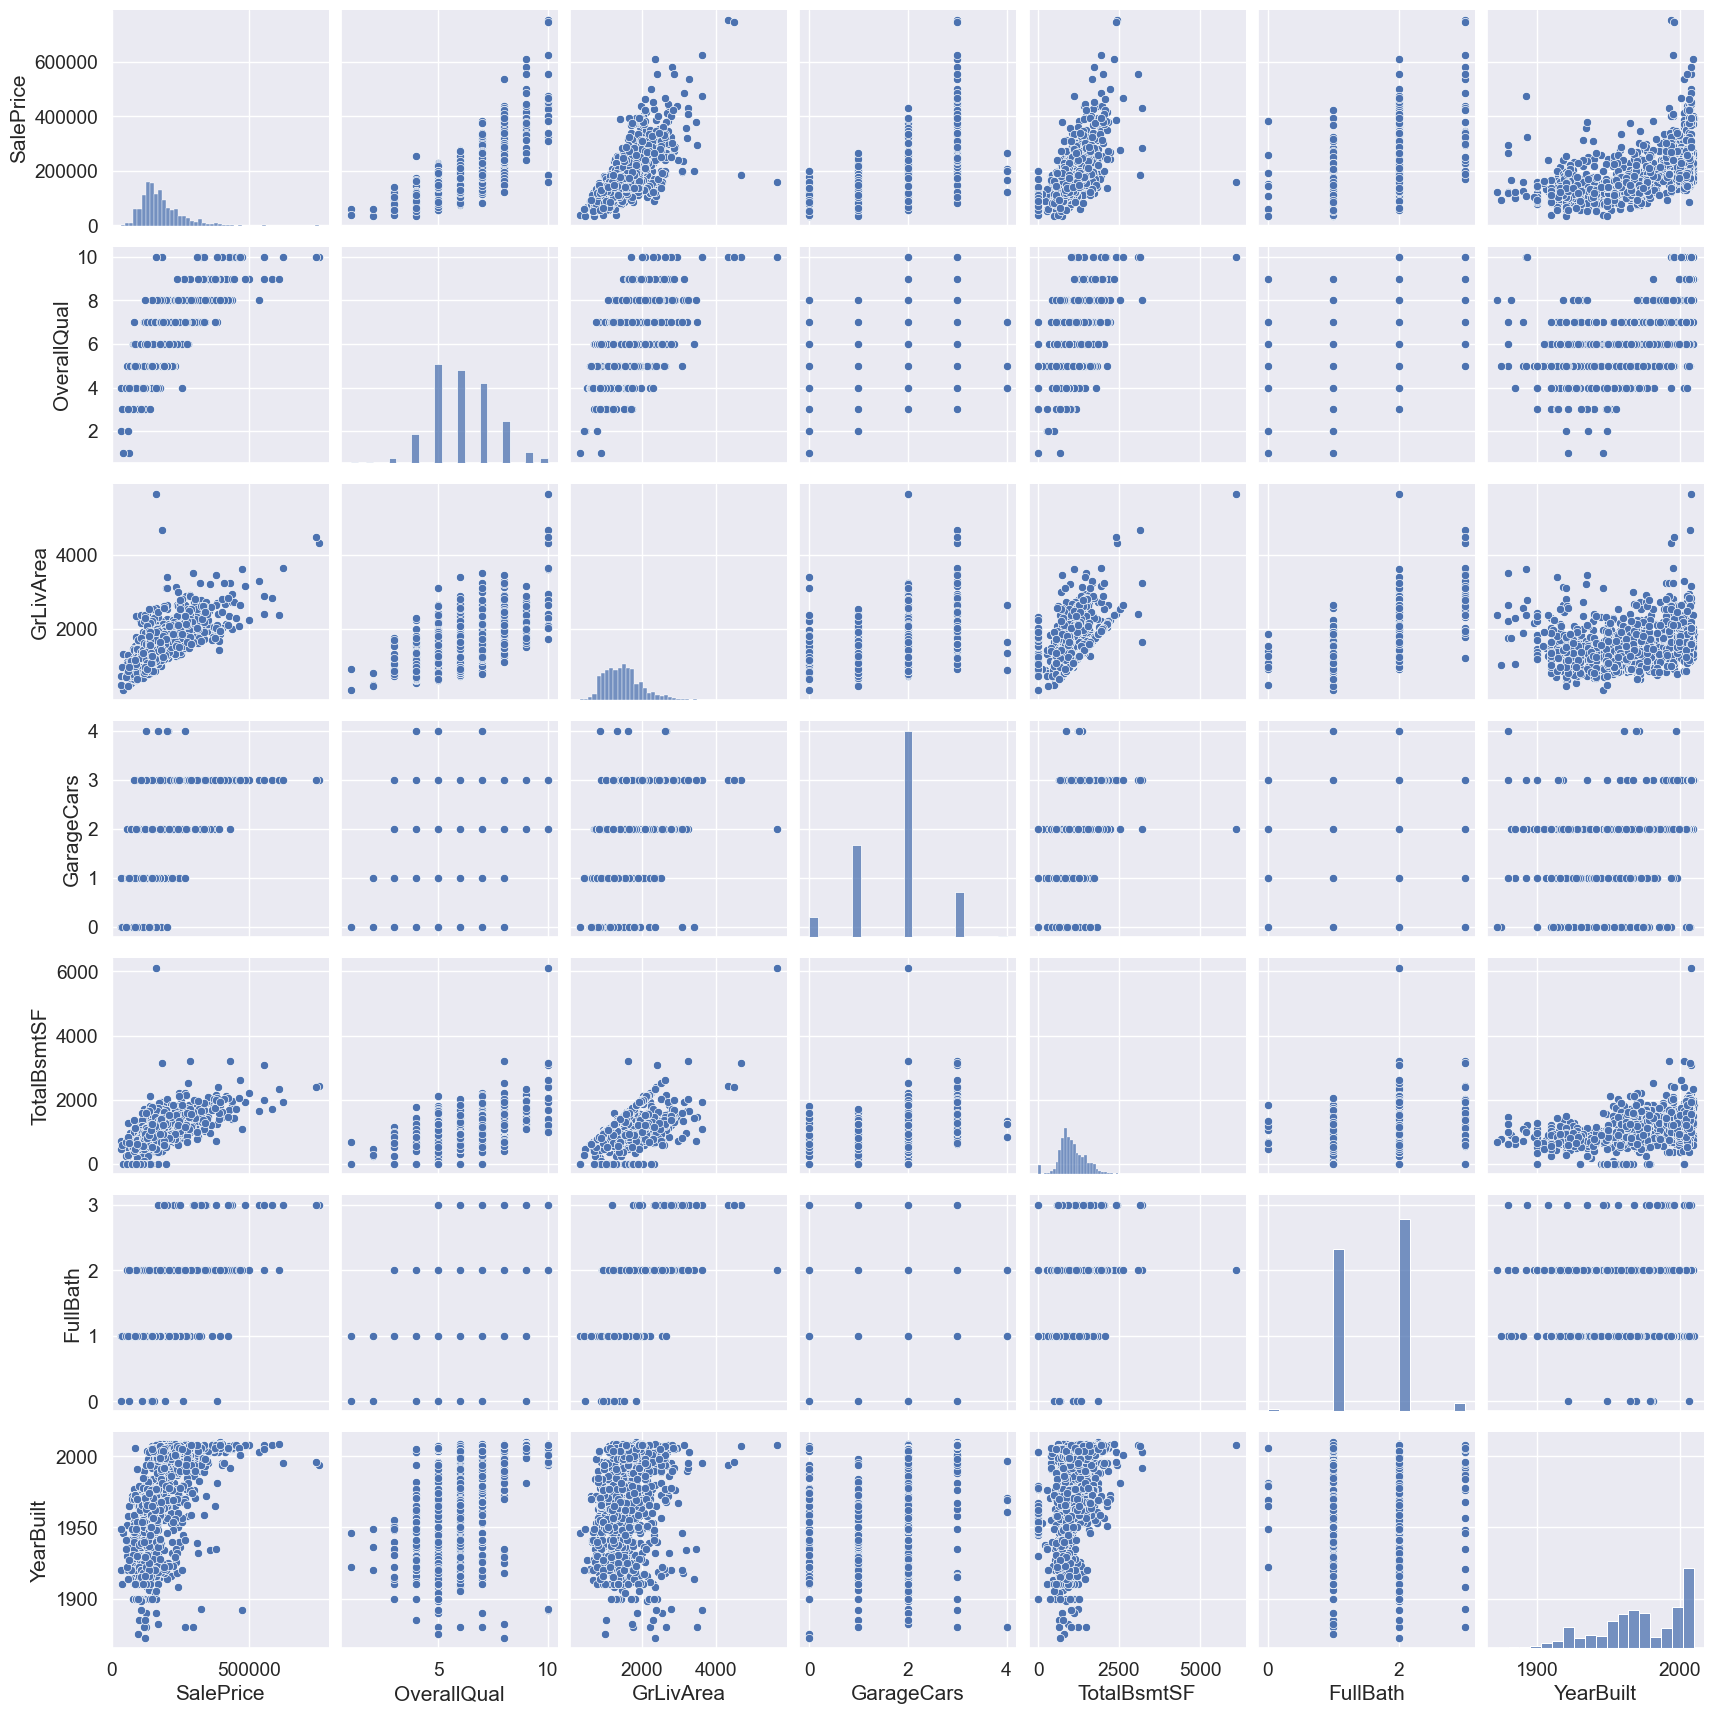

In [64]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea',
'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set (font_scale = 1.25) # Устанавливаем размер шрифта по горизонтальной и вертикальной оси
sns.pairplot (df[var_set]) # 7 * 7 графическая матрица
# Различные типы отображения могут быть установлены в параметрах kind и diag_kind, вот диаграммы разброса и гистограммы, и вы также можете установить разные типы
#отображения на каждом графике
plt.show()